In [1]:
import os
import torch
import matplotlib.pyplot as plt

We generated convergence maps with the default `sbi_lens` settings and stored them in `/data/scratch/convergence_maps/lsst_y10_lognormal`. The default `sbi_lens` settings are meant to emulate year 10 of LSST. The maps are of size 256x256x5, where 5 is the number of redshift bins.

Below, we load 1000 batches of 16 maps. Loading more batches is possible but takes a while. We also load the six cosmological parameters that generated them:

- $\Omega_c$: Amount of cold dark matter
- $\Omega_b$: Amount of baryonic matter
- $\sigma_8$: Clumpiness of matter
- $h_0$: How fast the Universe is expanding right now
- $n_s$: Variation in matter clumpiness at different scales in the early Universe
- $w_0$: Strength with which dark energy causes the Universe to expand

In [2]:
path = "/data/scratch/convergence_maps/lsst_y10_lognormal/"

num_batches_to_load = 1000  # there are around 6000 in total
batch_size = 16

maps = torch.zeros(num_batches_to_load * batch_size, 256, 256, 5)
params = torch.zeros(num_batches_to_load * batch_size, 6)

# this loop takes approximately 30 seconds
for i, f in enumerate(os.listdir(path)[:num_batches_to_load]):
    file = torch.load(os.path.join(path, f))
    maps[i * batch_size:(i + 1) * batch_size] = file["maps"]
    params[i * batch_size:(i + 1) * batch_size] = file["params"]

The tensors created above store 16,000 samples from the generative model:

In [3]:
maps.shape

torch.Size([16000, 256, 256, 5])

In [4]:
params.shape

torch.Size([16000, 6])

tensor([ 0.3748,  0.0412,  0.8809,  0.5787,  1.0573, -0.6724])

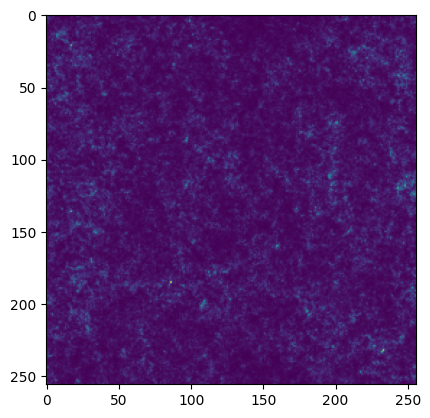

In [5]:
# sample graph
_ = plt.imshow(maps[0][...,0])

# sample parameters
params[0]

`maps` and `params` are paired (both have 16000).

Plot the convergence maps for all five redshift bins for a few samples (e.g., one sample per row, and each row has five columns). You'll want to use `plt.imshow()`.

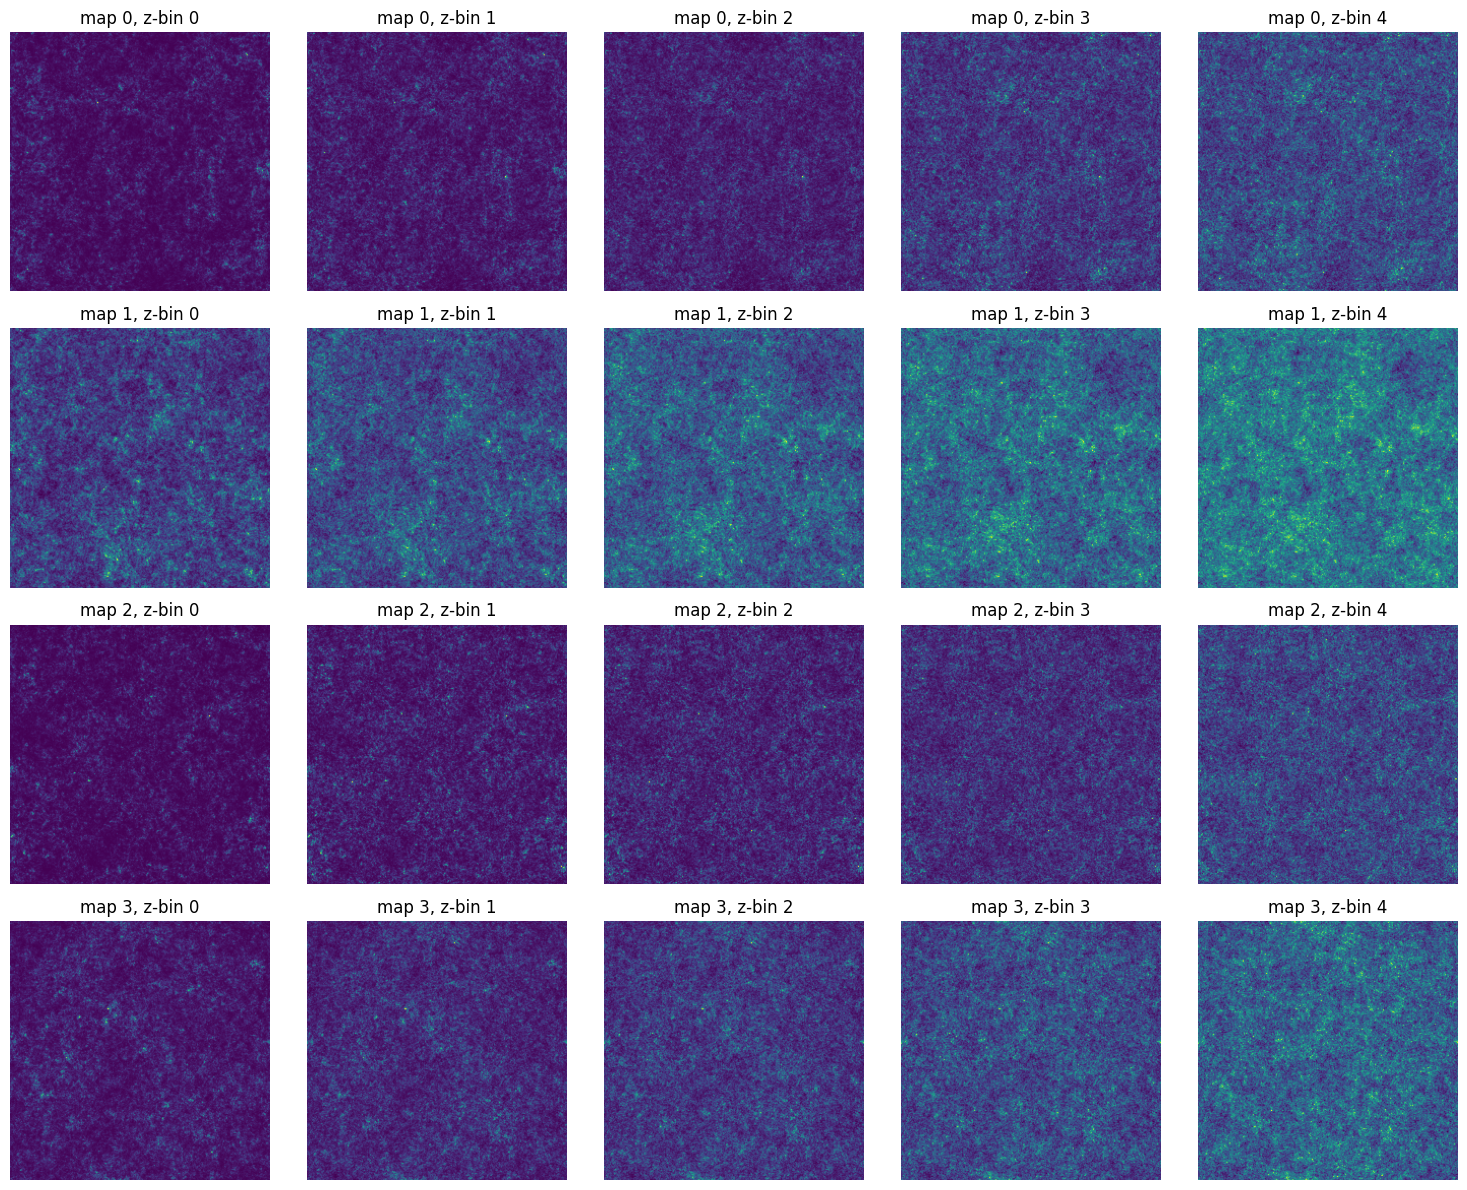

In [6]:
idxs = [0, 1, 2, 3]
fig, axes = plt.subplots(len(idxs), 5, figsize=(15, 3 * len(idxs)))

for r, idx in enumerate(idxs):
    for z in range(5):
        ax = axes[r, z] if len(idxs) > 1 else axes[z]
        im = ax.imshow(maps[idx][..., z], origin="lower")
        ax.set_title(f"map {idx}, z-bin {z}")
        ax.axis("off")

plt.tight_layout()
plt.show()

Plot histograms for all six cosmological parameters. The order of the parameters in `params` is `omega_c`, `omega_b`, `sigma_8`, `h_0`, `n_s`, `w_0`; label the histograms accordingly. You'll want to use `plt.hist()`.

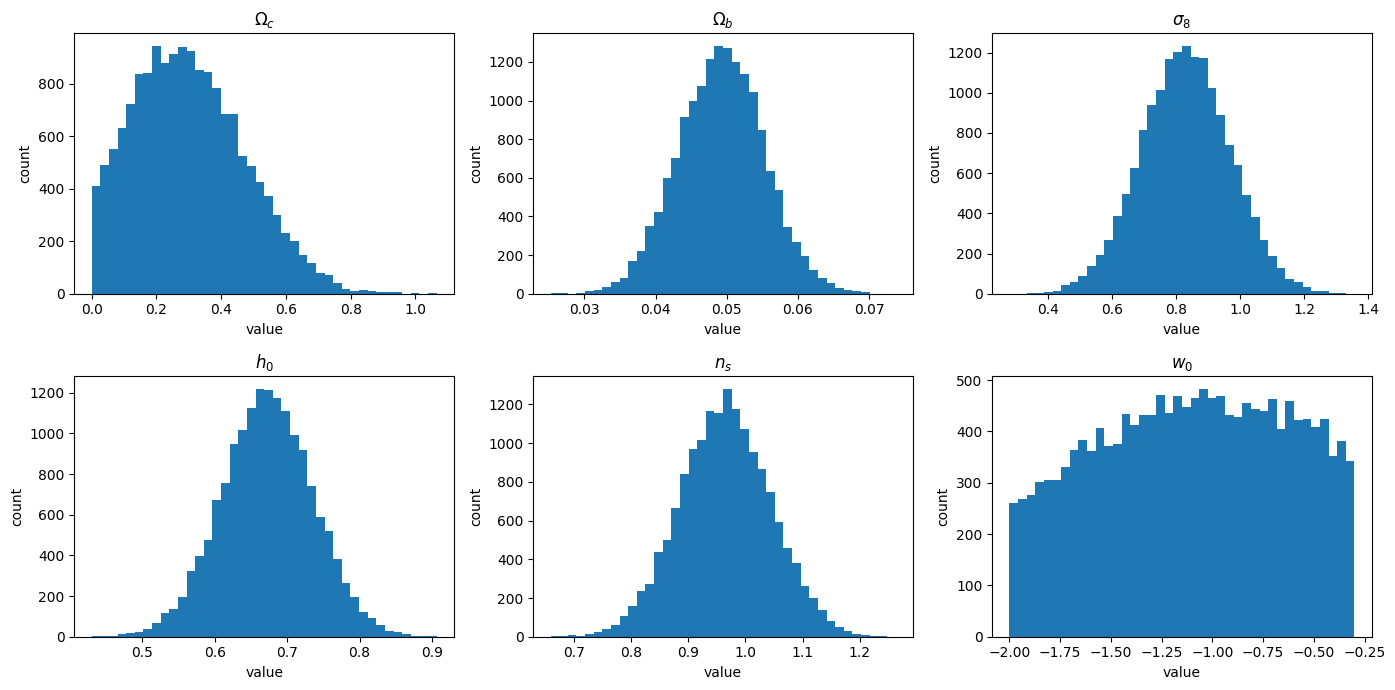

In [7]:
param_names = [r"$\Omega_c$", r"$\Omega_b$", r"$\sigma_8$", r"$h_0$", r"$n_s$", r"$w_0$"]
fig, axes = plt.subplots(2, 3, figsize=(14, 7))
axes = axes.flatten()

for i in range(6):
    axes[i].hist(params[:, i].numpy(), bins=40)
    axes[i].set_title(param_names[i])
    axes[i].set_xlabel("value")
    axes[i].set_ylabel("count")

plt.tight_layout()
plt.show()

Do the maps have any obvious traits for different values of the cosmological parameters? For example, do maps with large $\sigma_8$ look "clumpier" than those with small $\sigma_8$?

- $\sigma_8$: Maps with larger $\sigma_8$ should look more “clumpy” / higher contrast, meaning bigger and more numerous peaks/structures. 

- $\Omega_c$: Often affects overall structure growth and lensing strength too.

- $\Omega_b$: Weak lensing convergence maps are usually not very sensitive to $\Omega_b$ alone, so no clear visual signature expected

- $h_0$, $w_0$, $n_s$: These mainly influence the expansion history / distances / growth, and lensing-only signals tend to constrain them poorly. Any visual difference is subtle and can be washed out by noise + degeneracies.